In [88]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("bike.csv")
df_1 = df.head(2)
df_2 = df.tail(2)

In [3]:
pd.concat([df_1, df_2], axis = 1)

datetime  season  holiday  workingday weather  temp   atemp  \
0      2011-01-01 00:00:00     1.0      0.0         0.0     1.0  9.84  14.395   
1      2011-01-01 01:00:00     1.0      0.0         0.0     1.0  9.02  13.635   
10884                  NaN     NaN      NaN         NaN     NaN   NaN     NaN   
10885                  NaN     NaN      NaN         NaN     NaN   NaN     NaN   

       humidity  windspeed  casual  ...  holiday  workingday weather   temp  \
0          81.0        0.0     3.0  ...      NaN         NaN     NaN    NaN   
1          80.0        0.0     8.0  ...      NaN         NaN     NaN    NaN   
10884       NaN        NaN     NaN  ...      0.0         1.0     1.0  13.94   
10885       NaN        NaN     NaN  ...      0.0         1.0     1.0  13.12   

        atemp  humidity  windspeed  casual  registered  count  
0         NaN       NaN        NaN     NaN         NaN    NaN  
1         NaN       NaN        NaN     NaN         NaN    NaN  
10884  17.425      61.0     6.0032    12.0       117.0  129.0  
10885  16.665      66.0     8.9981     4.0        84.0   88.0  

[4 rows x 24 columns]

In [4]:
from statsmodels.tsa.seasonal import seasonal_decompose
from matplotlib import pyplot

In [5]:
df = pd.read_csv("AWS_sample.txt", sep = "#")
df = df.loc[df["AWS_ID"] == 108, ]
df["TM"] = pd.to_datetime(df["TM"])
df = df.set_index("TM")
df.head(2)

AWS_ID    TA  Wind X.
TM                                        
2016-07-01 00:00:00     108  24.2   2.3  =
2016-07-01 01:00:00     108  24.3   2.3  =

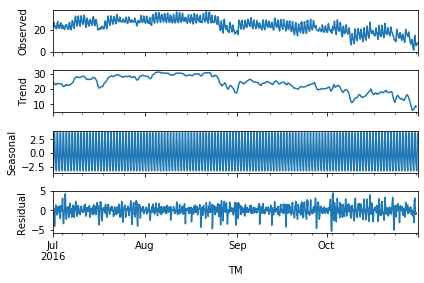

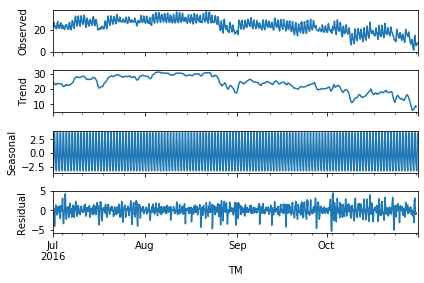

In [7]:
series = df["TA"]
result = seasonal_decompose(series, model="additive")
result.plot()

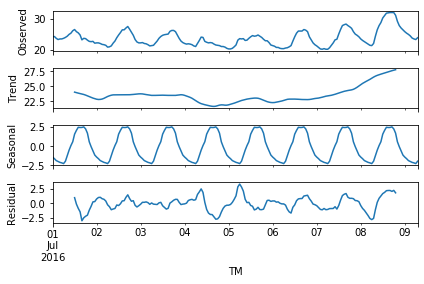

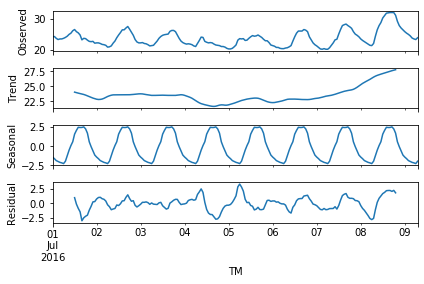

In [10]:
series = df["TA"][:200]
result = seasonal_decompose(series, model="additive")
result.plot()

In [20]:
from sklearn.datasets import make_moons
X, Y = make_moons(n_samples = 200, noise = 0.2,
                  random_state = 123)
df_moon = pd.concat([pd.DataFrame(X, columns = ["x", "y"]),
                     pd.Series(Y)],
                     axis = 1)

In [21]:
df_moon.head(2)

x         y  0
0 -0.077962  1.062934  0
1  0.202304 -0.067724  1

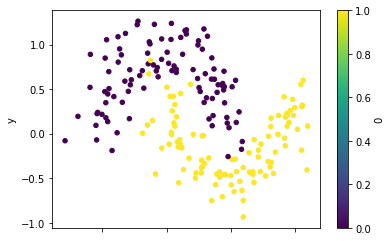

In [22]:
df_moon.plot.scatter(x = "x", y = "y", c = 0, 
                     colormap = "viridis")

In [55]:
from sklearn.model_selection import train_test_split

In [56]:
train_test_split()

ValueError: At least one array required as input

In [57]:
from sklearn.metrics import confusion_matrix
from sklearn.cluster import KMeans
df = pd.read_excel("iris_xlsx.xlsx")
X = df.iloc[:, :-1]
X.head(2)

Sepal.Length  Sepal.Width  Petal.Length  Petal.Width
0           5.1          3.5           1.4          0.2
1           4.9          3.0           1.4          0.2

In [58]:
kmeans = KMeans(n_clusters = 3)
kmeans = kmeans.fit(X)
kmeans

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [59]:
kmeans.labels_[:20]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [60]:
kmeans.cluster_centers_

array([[6.85384615, 3.07692308, 5.71538462, 2.05384615],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [5.88360656, 2.74098361, 4.38852459, 1.43442623]])

In [61]:
centroids = pd.DataFrame(kmeans.cluster_centers_,
                         columns = X.columns)
centroids

Sepal.Length  Sepal.Width  Petal.Length  Petal.Width
0      6.853846     3.076923      5.715385     2.053846
1      5.006000     3.428000      1.462000     0.246000
2      5.883607     2.740984      4.388525     1.434426

In [62]:
df["cluster"] = kmeans.labels_
df.head(2)

Sepal.Length  Sepal.Width  Petal.Length  Petal.Width Species  cluster
0           5.1          3.5           1.4          0.2  setosa        1
1           4.9          3.0           1.4          0.2  setosa        1

In [63]:
pd.crosstab(df["cluster"], df["Species"])

Species  setosa  versicolor  virginica
cluster                               
0             0           3         36
1            50           0          0
2             0          47         14

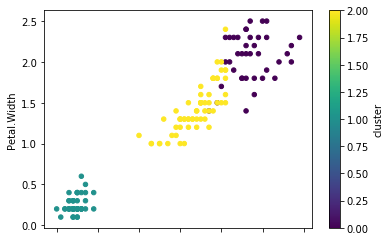

In [67]:
df.plot.scatter(x = "Petal.Length", y = "Petal.Width",
                c = "cluster", colormap = "viridis")

In [69]:
from sklearn.cluster import AgglomerativeClustering

df = pd.read_excel("iris_xlsx.xlsx")
X = df.drop("Species", axis = 1)

In [75]:
cluster = AgglomerativeClustering(n_clusters=3, affinity="euclidean", linkage="ward")

In [76]:
df["cluster"] = cluster.fit_predict(X)
df.drop("Species", axis = 1).groupby("cluster").mean()

Sepal.Length  Sepal.Width  Petal.Length  Petal.Width
cluster                                                      
0            5.920313     2.751563      4.420313     1.434375
1            5.006000     3.428000      1.462000     0.246000
2            6.869444     3.086111      5.769444     2.105556

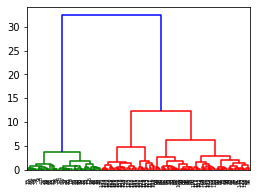

In [71]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt

linked = linkage(X, "ward")

plt.figure(figsize = (4, 3))
dendrogram(linked)
plt.show()

In [78]:
from statsmodels.formula import api
df = pd.read_csv("linear_regression_01.csv")
model = api.ols("y ~ x", data = df)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.129
Model:                            OLS   Adj. R-squared:                  0.089
Method:                 Least Squares   F-statistic:                     3.257
Date:                Thu, 28 May 2020   Prob (F-statistic):             0.0848
Time:                        14:39:50   Log-Likelihood:                -53.868
No. Observations:                  24   AIC:                             111.7
Df Residuals:                      22   BIC:                             114.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.9909      0.908      1.091      0.287      -0.893       2.875
x              0.3732      0.207      1.805      0.085      -0.056       0.802
==============================================================================
Omnibus:                        3.957   Durbin-Watson:                   0.999
Prob(Omnibus):                  0.138   Jarque-Bera (JB):                1.902
Skew:                           0.380   Prob(JB):                        0.386
Kurtosis:                       1.849   Cond. No.                         8.50
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [79]:
from statsmodels.formula.api import ols
df = pd.read_csv("linear_regression_01.csv")
model = ols("y ~ x", data = df)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.129
Model:                            OLS   Adj. R-squared:                  0.089
Method:                 Least Squares   F-statistic:                     3.257
Date:                Thu, 28 May 2020   Prob (F-statistic):             0.0848
Time:                        14:40:12   Log-Likelihood:                -53.868
No. Observations:                  24   AIC:                             111.7
Df Residuals:                      22   BIC:                             114.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.9909      0.908      1.091      0.287      -0.893       2.875
x              0.3732      0.207      1.805      0.085      -0.056       0.802
==============================================================================
Omnibus:                        3.957   Durbin-Watson:                   0.999
Prob(Omnibus):                  0.138   Jarque-Bera (JB):                1.902
Skew:                           0.380   Prob(JB):                        0.386
Kurtosis:                       1.849   Cond. No.                         8.50
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [80]:
from statsmodels.formula.api import ols
df = pd.read_csv("bike.csv")
model = ols("registered ~ weather + temp + atemp + humidity",
            data = df)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             registered   R-squared:                       0.163
Model:                            OLS   Adj. R-squared:                  0.163
Method:                 Least Squares   F-statistic:                     529.5
Date:                Thu, 28 May 2020   Prob (F-statistic):               0.00
Time:                        15:14:37   Log-Likelihood:                -69099.
No. Observations:               10886   AIC:                         1.382e+05
Df Residuals:                   10881   BIC:                         1.382e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    149.5536      6.146     24.332      0.000     137.506     161.602
weather        2.5958      2.293      1.132      0.258      -1.898       7.090
temp           1.9876      0.993      2.001      0.045       0.041       3.934
atemp          3.6211      0.912      3.969      0.000       1.833       5.410
humidity      -1.9964      0.076    -26.239      0.000      -2.146      -1.847
==============================================================================
Omnibus:                     3354.531   Durbin-Watson:                   0.481
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9775.966
Skew:                           1.623   Prob(JB):                         0.00
Kurtosis:                       6.320   Cond. No.                         334.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [81]:
model = ols("registered ~ temp + atemp + humidity",
            data = df)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             registered   R-squared:                       0.163
Model:                            OLS   Adj. R-squared:                  0.163
Method:                 Least Squares   F-statistic:                     705.5
Date:                Thu, 28 May 2020   Prob (F-statistic):               0.00
Time:                        15:18:33   Log-Likelihood:                -69100.
No. Observations:               10886   AIC:                         1.382e+05
Df Residuals:                   10882   BIC:                         1.382e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    151.3055      5.948     25.436      0.000     139.645     162.966
temp           2.0482      0.992      2.065      0.039       0.104       3.992
atemp          3.5589      0.911      3.907      0.000       1.774       5.344
humidity      -1.9613      0.069    -28.231      0.000      -2.097      -1.825
==============================================================================
Omnibus:                     3349.728   Durbin-Watson:                   0.480
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9744.694
Skew:                           1.621   Prob(JB):                         0.00
Kurtosis:                       6.313   Cond. No.                         321.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [82]:
result.resid

0        -50.826637
1        -29.403613
2        -34.403613
3        -65.594331
4        -74.594331
            ...    
10881    173.754650
10882     99.241896
10883     47.158313
10884     -5.233446
10885    -24.042728
Length: 10886, dtype: float64

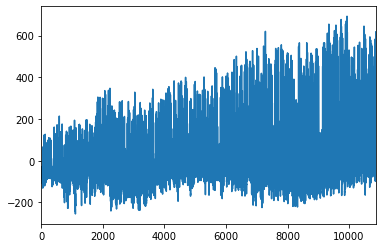

In [87]:
result.resid.plot()

In [89]:
dia = pd.read_csv("diamonds.csv")
dia.head(2)

carat      cut color clarity  depth  table  price     x     y     z
0   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31

In [91]:
dia_dummy = pd.get_dummies(dia, columns = ["cut"])
dia_dummy.head(2)

carat color clarity  depth  table  price     x     y     z  cut_Fair  \
0   0.23     E     SI2   61.5   55.0    326  3.95  3.98  2.43         0   
1   0.21     E     SI1   59.8   61.0    326  3.89  3.84  2.31         0   

   cut_Good  cut_Ideal  cut_Premium  cut_Very Good  
0         0          1            0              0  
1         0          0            1              0

In [115]:
dia_dummy = dia_dummy.rename(columns = {"cut_Very Good": "cut_VG"})
dia_dummy.head(2)

carat color clarity  depth  table  price     x     y     z  cut_Fair  \
0   0.23     E     SI2   61.5   55.0    326  3.95  3.98  2.43         0   
1   0.21     E     SI1   59.8   61.0    326  3.89  3.84  2.31         0   

   cut_Good  cut_Ideal  cut_Premium  cut_VG  
0         0          1            0       0  
1         0          0            1       0

In [118]:
from statsmodels.formula.api import ols
formula = "price ~ " + "+".join(["carat", "cut_Fair", "cut_Good",
                                 "cut_Ideal", "cut_Premium"])
formula

'price ~ carat+cut_Fair+cut_Good+cut_Ideal+cut_Premium'

In [ ]:
model = ols(formula,
            data = dia_dummy)
result = model.fit()
result.summary()

In [121]:
df_test = pd.DataFrame({"carat": [1],
                        "cut_Fair": [1],
                        "cut_Good": [0],
                        "cut_Premium": [0],
                        "cut_Ideal": [0]})
model.fit().predict(df_test)

0    3995.612434
dtype: float64

In [122]:
# from sklearn.metrics import accuracy_score
from sklearn import metrics

In [ ]:
metrics.fbeta_score()

In [123]:
from sklearn import tree
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

In [124]:
df = pd.read_csv("classification_data_01.csv")
df.head(2)

Variance  Skewness  Curtosis  Entropy  Class
0    3.6216    8.6661   -2.8073 -0.44699      0
1    4.5459    8.1674   -2.4586 -1.46210      0

In [126]:
len(df)

1372

In [125]:
X = df.drop("Class", axis = 1)
y = df["Class"]

In [127]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.2)

In [128]:
clf = tree.DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [129]:
confusion_matrix(y_test, y_pred)

array([[149,   3],
       [  4, 119]], dtype=int64)

In [130]:
pd.crosstab(y_test, y_pred)

col_0    0    1
Class          
0      149    3
1        4  119

In [131]:
metrics.accuracy_score(y_test, y_pred)

0.9745454545454545